# **CAPÍTULO 10: ARCHIVOS Y EXCEPCIONES**
* Lectura de un archivo
* Lectura del contenido de un archivo
* Rutas de archivo relativas y absolutas
* Acceso a las líneas de un archivo
* Trabajar con el contenido de un archivo
* Archivos grandes: un millón de dígitos
* ¿Está tu cumpleaños contenido en Pi?
* Ejercicio 10-1: Aprendiendo Python
* Ejercicio 10-2: Aprendiendo C
* Ejercicio 10-3: Código más simple
* Escritura en un archivo
* Escribir una sola línea
* Escribir múltiples líneas
* Ejercicio 10-4: Invitado
* Ejercicio 10-5: Libro de visitas
* Excepciones
* Manejo de la excepción ZeroDivisionError
* Uso de bloques try-except
* Utilizar excepciones para prevenir bloqueos
* El bloque else
* Manejo de la excepción FileNotFoundError
* Análisis de texto
* Trabajar con varios archivos
* Fracaso silencioso
* Decidir qué errores informar
* Ejercicio 10-6: Suma
* Ejercicio 10-7: Calculadora de suma
* Ejercicio 10-8: Gatos y perros
* Ejercicio 10-9: Gatos y perros silenciosos
* Ejercicio 10-10: Palabras comunes
* Almacenamiento de datos
* Uso de json.dumps() y json.loads()
* Guardar y leer datos generados por el usuario
* Refactorización
* Ejercicio 10-11: Número favorito
* Ejercicio 10-12: Número favorito recordado
* Ejercicio 10-13: Diccionario de usuario
* Ejercicio 10-14: Verificación de usuario
* Resumen

# ARCHIVOS Y EXCEPCIONES

Ahora que has dominado las habilidades básicas necesarias para escribir programas organizados que sean fáciles de usar, es hora de pensar en hacer que tus programas sean aún más relevantes y utilizables. En este capítulo, aprenderás a trabajar con archivos para que tus programas puedan analizar rápidamente grandes cantidades de datos.

Aprenderás a manejar errores para que tus programas no se bloqueen cuando encuentren situaciones inesperadas. Conocerás las excepciones, que son objetos especiales que Python crea para gestionar los errores que surgen mientras un programa se está ejecutando. También aprenderás sobre el módulo **`json`**, que te permitirá guardar datos de usuario para que no se pierdan cuando tu programa deje de ejecutarse.

Aprender a trabajar con archivos y guardar datos hará que tus programas sean más fáciles de usar. Los usuarios podrán elegir qué datos ingresar y cuándo ingresarlos. Las personas podrán ejecutar tu programa, hacer algún trabajo y luego cerrar el programa y retomar donde lo dejaron. Aprender a manejar excepciones te ayudará a lidiar con situaciones en las que los archivos no existen y a abordar otros problemas que pueden hacer que tus programas se bloqueen. Esto hará que tus programas sean más robustos cuando encuentren datos incorrectos, ya sea por errores inocentes o por intentos malintencionados de romper tus programas. Con las habilidades que aprenderás en este capítulo, harás que tus programas sean más aplicables, utilizables y estables.

**Nota:**

Las excepciones en Python o Django se utilizan principalmente para manejar errores que pueden ocurrir durante la ejecuciòn del programa, evitando que este se detenga de forma abrupta. Se implementan en los contextos donde es importante garantizar la estabilidad del sistema o responder de manera controlada a situaciones inesperadas.


# Lectura desde un Archivo

Una cantidad increíble de datos está disponible en archivos de texto. Los archivos de texto pueden contener datos meteorológicos, datos de tráfico, datos socioeconómicos, obras literarias y más. Leer desde un archivo es especialmente útil en aplicaciones de análisis de datos, pero también es aplicable a cualquier situación en la que desees analizar o modificar información almacenada en un archivo. Por ejemplo, puedes escribir un programa que lea el contenido de un archivo de texto y vuelva a escribir el archivo con un formato que permita que un navegador lo muestre.

Cuando deseas trabajar con la información en un archivo de texto, el primer paso es leer el archivo en la memoria. Luego puedes trabajar a través de todo el contenido del archivo de una vez o trabajar a través del contenido línea por línea.

# Leyendo el contenido de un archivo

Para empezar, necesitamos un archivo con algunas líneas de texto. Comencemos con un archivo que contenga el valor de pi hasta 30 decimales, con 10 decimales por línea:

```python
# pi_digits.txt

3.1415926535
  8979323846
  2643383279
```

Para probar los siguientes ejemplos por ti mismo, puedes ingresar estas líneas en un editor y guardar el archivo como pi_digits.txt, o puedes descargar el archivo desde los recursos del libro a través de https://ehmatthes.github.io/pcc_3e. Guarda el archivo en el mismo directorio donde almacenarás los programas de este capítulo.

Aquí tienes un programa que abre este archivo, lo lee y imprime el contenido del archivo en la pantalla:

In [36]:
# file_reader.py

from pathlib import Path    # Importamos la clase Path de pathlib

path = Path('pi_digits.txt')
contents = path.read_text()
print(contents)

3.1415926535 
  8979323846 
  2643383279



Para trabajar con el contenido de un archivo, necesitamos decirle a Python la ruta del archivo. Una ruta es la ubicación exacta de un archivo o carpeta en un sistema. Python proporciona un módulo llamado **`pathlib`** que facilita el trabajo con archivos y directorios, sin importar el sistema operativo que tú o los usuarios de tu programa estén utilizando. Un módulo que proporciona funcionalidades específicas como esta se llama a menudo biblioteca, de ahí el nombre pathlib.

Comenzamos importando la clase Path de pathlib. Hay mucho que puedes hacer con un objeto Path que apunta a un archivo. Por ejemplo, puedes verificar que el archivo exista antes de trabajar con él, leer el contenido del archivo o escribir nuevos datos en el archivo. Aquí, creamos un objeto Path que representa el archivo `pi_digits.txt`, al que asignamos a la variable `path`. Dado que este archivo está guardado en el mismo directorio que el archivo .py que estamos escribiendo, el nombre del archivo es todo lo que Path necesita para acceder al archivo.

**NOTA:**

VS Code busca archivos en la carpeta que fue abierta más recientemente.
Si estás utilizando VS Code, comienza abriendo la carpeta donde estás almacenando los programas de este capítulo. Por ejemplo, si estás guardando tus archivos de programa en una carpeta llamada chapter_10, presiona CTRL-O (⌘-O en macOS) y abre esa carpeta.

Una vez que tenemos un objeto Path que representa a pi_digits.txt, utilizamos el método `read_text()` para leer todo el contenido del archivo. El contenido del archivo se devuelve como una cadena única, que asignamos a la variable `contents`. Cuando imprimimos el valor de `contents`, vemos todo el contenido del archivo de texto:

```python
3.1415926535
  8979323846
  2643383279
```

La única diferencia entre esta salida y el archivo original es la línea en blanco adicional al final de la salida. La línea en blanco aparece porque `read_text()` devuelve una cadena vacía cuando alcanza el final del archivo; esta cadena vacía se muestra como una línea en blanco.

Podemos eliminar la línea en blanco adicional utilizando `rstrip()` en la cadena `contents`:

In [37]:
from pathlib import Path

path = Path('pi_digits.txt')
contents = path.read_text()
contents = contents.rstrip()
print(contents)

3.1415926535 
  8979323846 
  2643383279


Recuerda del Capítulo 2 que el método `rstrip()` de Python elimina, o "strips", cualquier carácter de espacio en blanco del lado derecho de una cadena. Ahora, la salida coincide exactamente con el contenido del archivo original:

```python
3.1415926535
  8979323846
  2643383279
```

Podemos eliminar el carácter de nueva línea al final cuando leemos el contenido del archivo, aplicando el método `rstrip()` inmediatamente después de llamar a `read_text()`:

In [38]:
contents = path.read_text().rstrip()

Esta línea le indica a Python que llame al método `read_text()` en el archivo con el que estamos trabajando. Luego, aplica el método `rstrip()` a la cadena que devuelve `read_text()`. La cadena depurada se asigna a la variable `contents`. Este enfoque se llama "method chaining" (encadenamiento de métodos), y lo verás utilizado con frecuencia en programación.

# Rutas de archivos relativas y absolutas

Cuando pasas un nombre de archivo simple como pi_digits.txt a Path, Python busca en el directorio donde se encuentra almacenado el archivo que se está ejecutando actualmente (es decir, tu archivo .py de programa).
A veces, dependiendo de cómo organices tu trabajo, es posible que el archivo que desees abrir no esté en el mismo directorio que tu archivo de programa. Por ejemplo, podrías almacenar tus archivos de programa en una carpeta llamada python_work; dentro de python_work, podrías tener otra carpeta llamada text_files para distinguir tus archivos de programa de los archivos de texto que están manipulando. Aunque text_files está dentro de python_work, simplemente pasarle a Path el nombre de un archivo en text_files no funcionará, porque Python solo buscará en python_work y se detendrá allí; no buscará en text_files. Para que Python abra archivos desde un directorio que no sea donde se almacena tu archivo de programa, necesitas proporcionar la ruta correcta.
Hay dos formas principales de especificar rutas en programación. Una ruta de archivo relativa le indica a Python que busque en una ubicación dada en relación con el directorio donde se almacena actualmente el archivo de programa en ejecución. Dado que text_files está dentro de python_work, necesitamos construir una ruta que comience con el directorio text_files y termine con el nombre del archivo. Así es cómo construir esta ruta:

In [39]:
path = Path('text_files/filename.txt')

También puedes indicarle a Python exactamente dónde se encuentra el archivo en tu computadora, independientemente de dónde se almacene el programa que se está ejecutando. Esto se llama una ruta de archivo absoluta. Puedes usar una ruta absoluta si una ruta relativa no funciona. Por ejemplo, si has colocado text_files en alguna carpeta que no sea python_work, simplemente pasarle a Path la ruta 'text_files/filename.txt' no funcionará porque Python solo buscará esa ubicación dentro de python_work. Necesitarás escribir una ruta absoluta para indicar claramente dónde deseas que Python busque.
Las rutas absolutas suelen ser más largas que las rutas relativas, ya que comienzan en la carpeta raíz de tu sistema:

In [40]:
path = Path('/home/eric/data_files/text_files/filename.txt')

Usando rutas absolutas, puedes leer archivos desde cualquier ubicación en tu sistema. Por ahora, es más fácil almacenar los archivos en el mismo directorio que tus archivos de programa, o en una carpeta como text_files dentro del directorio que almacena tus archivos de programa.

**NOTA:**

Los sistemas Windows utilizan una barra invertida \ en lugar de una barra diagonal (/) al mostrar rutas de archivos, pero debes usar barras diagonales en tu código, incluso en Windows. La biblioteca pathlib automáticamente utilizará la representación correcta de la ruta cuando interactúe con tu sistema o el sistema de cualquier usuario.

# Acceder a las líneas de un archivo

Cuando trabajas con un archivo, a menudo querrás examinar cada línea del archivo. Puede que estés buscando información específica en el archivo o que desees modificar el texto de alguna manera. Por ejemplo, podrías querer leer un archivo de datos meteorológicos y trabajar con cualquier línea que incluya la palabra "soleado" en la descripción del clima de ese día. En un informe de noticias, podrías buscar cualquier línea con la etiqueta `<headline>` y reescribir esa línea con un formato específico.
Puedes usar el método `splitlines()` para convertir una cadena larga en un conjunto de líneas, y luego utilizar un bucle `for` para examinar cada línea de un archivo, una por una:

In [65]:
# file_reader.py

from pathlib import Path

path = Path('pi_digits.txt')
contents = path.read_text()

lines = contents.splitlines()
for line in lines:
    print(line)

3.1415926535 
  8979323846 
  2643383279


Comenzamos leyendo todo el contenido del archivo, como hicimos anteriormente. Si planeas trabajar con las líneas individuales de un archivo, no es necesario eliminar ningún espacio en blanco al leer el archivo. El método **`splitlines()`** devuelve una lista de todas las líneas en el archivo, y asignamos esta lista a la variable `lines`. Luego, recorremos estas líneas e imprimimos cada una:

```python
3.1415926535
  8979323846
  2643383279
```

Dado que no hemos modificado ninguna de las líneas, la salida coincide exactamente con el archivo de texto original.

# Trabajando con el contenido de un archivo

Después de haber leído el contenido de un archivo en la memoria, puedes hacer lo que desees con esos datos. Así que exploremos brevemente los dígitos de pi. Primero, intentaremos construir una sola cadena que contenga todos los dígitos en el archivo sin espacios en blanco:

In [72]:
# pi_string.py

from pathlib import Path

path = Path('pi_digits.txt')
contents = path.read_text()

lines = contents.splitlines()
pi_string = ''
for line in lines:
    pi_string += line
print(pi_string)
print(len(pi_string))

3.1415926535  8979323846  2643383279
36


Comenzamos leyendo el archivo y almacenando cada línea de dígitos en una lista, igual que en el ejemplo anterior. Luego creamos una variable, `pi_string`, para contener los dígitos de pi. Escribimos un bucle que agrega cada línea de dígitos a `pi_string`. Imprimimos esta cadena y también mostramos cuánto mide la cadena:

```python
3.1415926535   8979323846   2643383279
38
```

La variable `pi_string` contiene los espacios en blanco que estaban en el lado izquierdo de los dígitos en cada línea, pero podemos deshacernos de eso utilizando `lstrip()` en cada línea:

In [74]:
# pi_string.py

from pathlib import Path

path = Path('pi_digits.txt')
contents = path.read_text()

lines = contents.splitlines()
pi_string = ''
for line in lines:
    pi_string += line.lstrip()

print(pi_string)
print(len(pi_string))

3.141592653589793238462643383279
32


Ahora tenemos una cadena que contiene pi hasta 30 decimales. La cadena tiene 32 caracteres de longitud porque también incluye el 3 inicial y un punto decimal:

```python
3.141592653589793238462643383279
32
```

**NOTA:**

Cuando Python lee de un archivo de texto, interpreta todo el texto en el archivo como una cadena. Si lees un número y deseas trabajar con ese valor en un contexto numérico, deberás convertirlo a un entero (int) o a un número de punto flotante (float).

# Archivos grandes: Un millón de dígitos

Hasta ahora, nos hemos centrado en analizar un archivo de texto que contiene solo tres líneas, pero el código en estos ejemplos funcionaría igual de bien en archivos mucho más grandes. Si comenzamos con un archivo de texto que contiene pi hasta 1,000,000 de decimales en lugar de solo 30, podemos crear una sola cadena que contenga todos estos dígitos. No necesitamos cambiar nuestro programa en absoluto, excepto para pasarle un archivo diferente. También imprimiremos solo los primeros 50 decimales, para no tener que ver pasar un millón de dígitos en la terminal:

In [76]:
# pi_string.py

from pathlib import Path

path = Path('pi_million_digits.txt')
contents = path.read_text()

lines = contents.splitlines()
pi_string = ''
for line in lines:
    pi_string += line.lstrip()

print(f"{pi_string[:52]}...")
print(len(pi_string))

3.14159265358979323846264338327950288419716939937510...
1000002


La salida muestra que efectivamente tenemos una cadena que contiene pi hasta 1,000,000 de decimales:

```python
3.14159265358979323846264338327950288419716939937510...
1000002
```

Python no tiene un límite inherente en cuanto a la cantidad de datos con los que puedes trabajar; puedes manejar la cantidad de datos que la memoria de tu sistema pueda gestionar.

**NOTA:**

Para ejecutar este programa (y muchos de los ejemplos que siguen), necesitarás descargar los recursos disponibles en https://ehmatthes.github.io/pcc_3e.

# ¿Está tu cumpleaños contenido en pi?

Siempre he tenido curiosidad por saber si mi cumpleaños aparece en algún lugar de los dígitos de pi. Utilicemos el programa que acabamos de escribir para averiguar si el cumpleaños de alguien aparece en los primeros millones de dígitos de pi. Podemos hacer esto expresando cada cumpleaños como una cadena de dígitos y viendo si esa cadena aparece en algún lugar de `pi_string`:

In [77]:
# pi_birthday.py

from pathlib import Path

path = Path('pi_million_digits.txt')
contents = path.read_text()

lines = contents.splitlines()
pi_string = ''
for line in lines:
    pi_string += line.strip()

birthday = input("Enter your bithday, in the form mmddyy: ")
if birthday in pi_string:
    print("Your birthday appers in the first million digits of pi!")
else:
    print("Yourt birthday does not appear in the first million digits of pi.")

Yourt birthday does not appear in the first million digits of pi.


Primero solicitamos la fecha de cumpleaños del usuario y luego verificamos si esa cadena está en `pi_string`. Intentémoslo:

In [80]:
# pi_birthday.py

from pathlib import Path

path = Path('pi_million_digits.txt')
contents = path.read_text()

lines = contents.splitlines()
pi_string = ''
for line in lines:
    pi_string += line.strip()

birthday = input("Enter your bithday, in the form mmddyy: ")
if birthday in pi_string:
    print("Your birthday appers in the first million digits of pi!")
else:
    print("Yourt birthday does not appear in the first million digits of pi.")

Your birthday appers in the first million digits of pi!


```python
Enter your birthdate, in the form mmddyy: 120372
Your birthday appears in the first million digits of pi!
```

¡Mi cumpleaños sí aparece en los dígitos de pi! Una vez que hayas leído desde un archivo, puedes analizar su contenido de casi cualquier manera que puedas imaginar.

# **HAZLO TU MISMO**

**10-1. Aprendiendo Python:** 

* Abre un archivo en blanco en tu editor de texto y escribe algunas líneas resumiendo lo que has aprendido sobre Python hasta ahora. 
* Comienza cada línea con la frase En Python puedes... . Guarda el archivo como learning_python.txt en el mismo directorio que tus ejercicios de este capítulo.
* Escribe un programa que lea el archivo e imprima lo que escribiste dos veces: imprime el contenido una vez leyendo todo el archivo y otra vez almacenando las líneas en una lista y luego recorriendo cada línea.

In [86]:
from pathlib import Path

path = Path("learning_python.txt")
contents = path.read_text()

lines = contents.splitlines()
string = ''
for line in lines:
    string += line

print(f"{string}")

En Python puedes ....En Python puedes crear clasesEn Python puedes crear instanciasEn Python puedes hacer analisis de datosEn Python puedes hacer desarrollo de software


In [87]:
from pathlib import Path

path = Path('learning_python.txt')
content = path.read_text()

lines = content.splitlines()    # splitlines() divide una cadena en una lista --> Divide la cadena en rupturas de linea
for line in lines:
    print(line)

En Python puedes ....
En Python puedes crear clases
En Python puedes crear instancias
En Python puedes hacer analisis de datos
En Python puedes hacer desarrollo de software



**10-2. Aprendiendo C:** 

* Puedes usar el método `replace()` para reemplazar cualquier palabra en una cadena con una palabra diferente. Aquí tienes un ejemplo rápido que muestra cómo reemplazar 'perro' con 'gato' en una oración:
```python
    >>> message = "I really like dogs."
    >>> message.replace('dog', 'cat')
    'I really like cats.'
```

Lee cada línea del archivo que acabas de crear, learning_python.txt, y reemplaza la palabra Python con el nombre de otro lenguaje, como C. Imprime cada línea modificada en la pantalla.

In [105]:
from pathlib import Path

# Leemos el contenido del archivo
path = Path('learning_python.txt')
content = path.read_text()

# Dividimos el contenido en lìneas
lines = content.splitlines()    # Divide la cadena en rupturas de lìneas


# Reemplazar 'python' con 'C' y mostramos el resultado
for line in lines:
    modified_line = line.replace('Python', 'C')
    print(modified_line)

En C puedes ....
En C puedes crear clases
En C puedes crear instancias
En C puedes hacer analisis de datos
En C puedes hacer desarrollo de software



**10-3. Código más sencillo:** 

* El programa file_reader.py en esta sección utiliza una variable temporal, lines, para mostrar cómo funciona splitlines(). 
* Puedes omitir la variable temporal y hacer un bucle directamente sobre la lista que devuelve splitlines():
```python
    for line in contents.splitlines():
```
* Elimina la variable temporal de cada uno de los programas en esta sección para hacerlos más concisos.

In [106]:
from pathlib import Path

# Leemos el contenido del archivo
path = Path('learning_python.txt')
content = path.read_text()

# Iteramos directamente sobre las lìneas divididas
for line in content.splitlines():    # Sin usar una variable temporal
    modified_line = line.replace('Python', 'C')
    print(modified_line)

En C puedes ....
En C puedes crear clases
En C puedes crear instancias
En C puedes hacer analisis de datos
En C puedes hacer desarrollo de software



# Escribir en un archivo

Una de las formas más simples de guardar datos es escribirlos en un archivo. Cuando escribes texto en un archivo, la salida seguirá estando disponible después de que cierres la terminal que contiene la salida de tu programa. Puedes examinar la salida después de que el programa termine de ejecutarse, y también puedes compartir los archivos de salida con otros. También puedes escribir programas que lean el texto de nuevo en la memoria y trabajen con él más adelante.

# Escribir una línea única

Una vez que tengas una ruta definida, puedes escribir en un archivo utilizando el método `write_text()`. Para ver cómo funciona, escribamos un mensaje sencillo y guárdelo en un archivo en lugar de imprimirlo en la pantalla:

In [107]:
# write_message.py

from pathlib import Path

path = Path('programming.txt')
path.write_text('I love programming')

18

El método `write_text()` toma un solo argumento: la cadena que deseas escribir en el archivo. Este programa no tiene salida en la terminal, pero si abres el archivo programming.txt, verás una línea:

```python
# programming.txt

I love programming.
```

Este archivo se comporta como cualquier otro archivo en tu computadora. Puedes abrirlo, escribir nuevo texto en él, copiar desde él, pegar en él, y así sucesivamente.

**NOTA:**

Python solo puede escribir cadenas en un archivo de texto. Si deseas almacenar datos numéricos en un archivo de texto, primero tendrás que convertir los datos al formato de cadena utilizando la función `str()`.

# Escribir varias líneas

El método `write_text()` realiza algunas acciones detrás de escena. Si el archivo al que apunta la ruta no existe, crea ese archivo. Además, después de escribir la cadena en el archivo, se asegura de que el archivo se cierre correctamente. Los archivos que no se cierran correctamente pueden provocar la pérdida o corrupción de datos.

Para escribir más de una línea en un archivo, necesitas construir una cadena que contenga todo el contenido del archivo y luego llamar a `write_text()` con esa cadena. Escribamos varias líneas en el archivo programming.txt:

In [108]:
from pathlib import Path

contents = 'I love programming.\n'
contents += "I lovre creating new games.\n"
contents += "I also love working with data.\n"

path = Path('programming.txt')
path.write_text(contents)

79

Definimos una variable llamada `contents` que contendrá todo el contenido del archivo. En la siguiente línea, utilizamos el operador `+=` para agregar a esta cadena. Puedes hacer esto tantas veces como sea necesario para construir cadenas de cualquier longitud. En este caso, incluimos caracteres de nueva línea al final de cada línea para asegurarnos de que cada declaración aparezca en su propia línea.

Si ejecutas esto y luego abres programming.txt, verás cada una de estas líneas en el archivo de texto:

```python
I love programming.
I lovre creating new games.
I also love working with data.
```

También puedes utilizar espacios, caracteres de tabulación y líneas en blanco para dar formato a tu salida, al igual que has estado haciendo con la salida basada en la terminal. No hay límite en la longitud de tus cadenas, y así es como se crean muchos documentos generados por computadora.

**NOTA:**

Ten cuidado al llamar a `write_text()` en un objeto de tipo Path. Si el archivo ya existe, `write_text()` borrará el contenido actual del archivo y escribirá nuevos contenidos en el archivo. Más adelante en este capítulo, aprenderás a verificar si un archivo existe utilizando pathlib.

# **HAZLO TU MISMO**

**10-4. Invitado:** 

* Escribe un programa que solicite al usuario su nombre. 
* Cuando respondan, escribe su nombre en un archivo llamado guest.txt.

In [109]:
from pathlib import Path

name = input('Ingresa tu nombre por favor: ')

content = name

path = Path('guest.txt')
path.write_text(content)

9

**10-5. Libro de visitas:** 

* Escribe un bucle while que solicite a los usuarios sus nombres. 
* Recopila todos los nombres que se ingresan y luego escribe estos nombres en un archivo llamado guest_book.txt. 
* Asegúrate de que cada entrada aparezca en una nueva línea en el archivo.

In [114]:
from pathlib import Path

# Ruta del archivo donde guardaremos los nombres
path = Path('guest_book.txt')

# Inicializamos el bucle while
print("Escribe 'salir' para terminar.")
while True:
    name = input("Ingresa tu nombre: ")

    if name.lower() == 'salir':     # Nuestra condiciòn para terminar
        print("Gracias por participar. ¡Hasta pronto!")
        break

    # Confirmamos y registramos el nombre en el archivo
    print(f"¡Hola, {name}! Tu nombre ha sido añadido al libro de visitas.")
    with path.open(mode='a') as file:    # Abrir en modeo append
        file.write(f"{name}\n")

Escribe 'salir' para terminar.
¡Hola, carol g! Tu nombre ha sido añadido al libro de visitas.
¡Hola, karol g! Tu nombre ha sido añadido al libro de visitas.
Gracias por participar. ¡Hasta pronto!


# **Excepciones**

Python utiliza objetos especiales llamados excepciones para gestionar errores que surgen durante la ejecución de un programa. Si ocurre un error que hace que Python no esté seguro de qué hacer a continuación, crea un objeto de excepción. Si escribes código que maneja la excepción, el programa continuará ejecutándose. Si no manejas la excepción, el programa se detendrá y mostrará un rastreo de pila (traceback), que incluye un informe de la excepción que se generó.

Las excepciones se manejan con bloques **`try-except`**. Un bloque try-except le pide a Python que haga algo, pero también le dice a Python qué hacer si se genera una excepción. Cuando utilizas bloques try-except, tus programas continuarán ejecutándose incluso si las cosas empiezan a salir mal. En lugar de los rastreos de pila, que pueden ser confusos para los usuarios, estos verán mensajes de error amigables que hayas escrito.

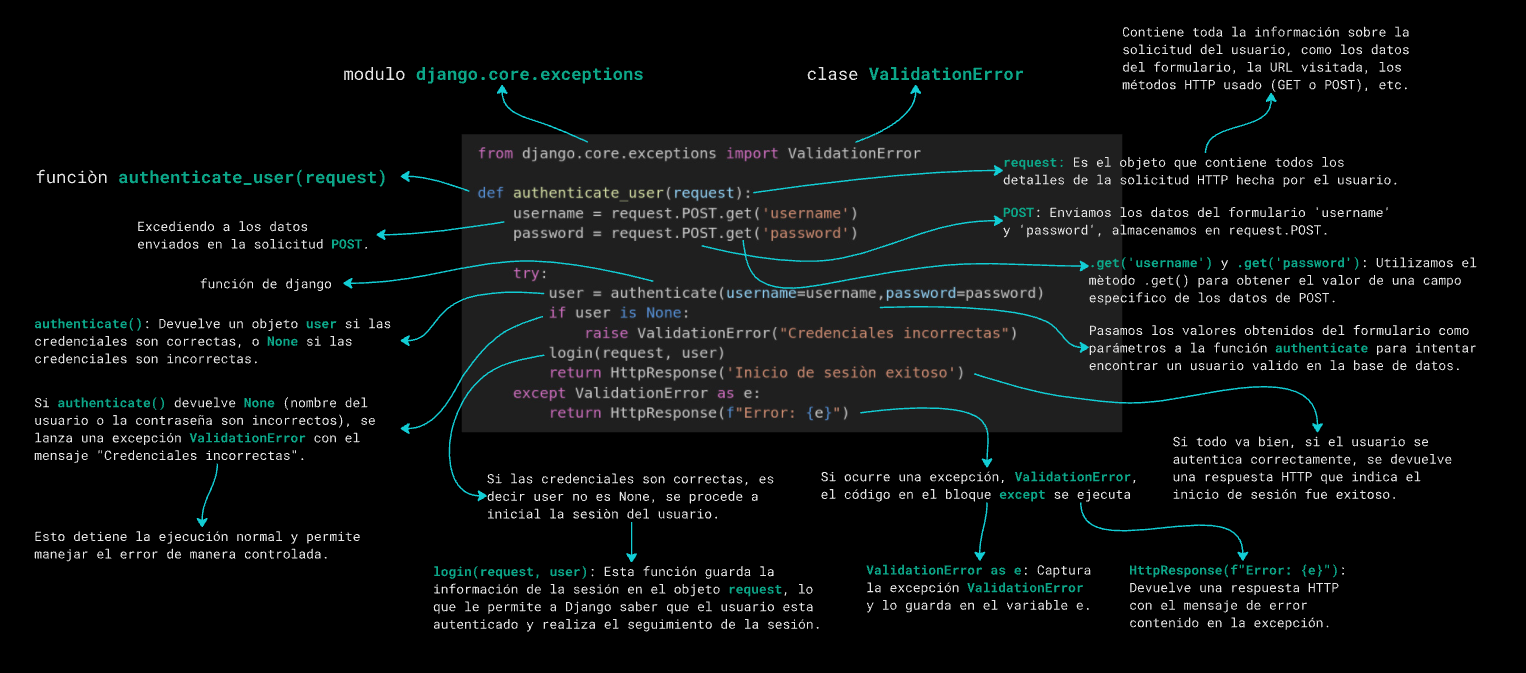

# Manejo de la excepción ZeroDivisionError

Veamos un error simple que hace que Python genere una excepción. Probablemente sepas que es imposible dividir un número por cero, pero pidamos a Python que lo haga de todos modos:

In [5]:
# division_calculator.py

print(5/0)

ZeroDivisionError: division by zero

Python no puede hacer esto, así que tenemos un rastro:

```python
Traceback (most recent call last):
File "division_calculator.py", line 1, in <module>
print(5/0)
~^~
ZeroDivisionError: division by zero
```

El error reportado en el rastreo de pila, **`ZeroDivisionError`**, es un objeto de excepción. Python crea este tipo de objeto en respuesta a una situación en la que no puede hacer lo que le pedimos. Cuando esto sucede, Python detiene el programa y nos informa sobre el tipo de excepción que se generó. Podemos utilizar esta información para modificar nuestro programa. Le diremos a Python qué hacer cuando ocurra este tipo de excepción; de esta manera, si sucede nuevamente, estaremos preparados.

# Usando bloques **try-except**

Cuando crees que puede ocurrir un error, puedes escribir un bloque **`try-except`** para manejar la excepción que podría generarse. Le indicas a Python que intente ejecutar algún código y le dices qué hacer si el código resulta en un tipo particular de excepción.
Así es como se ve un bloque try-except para manejar la excepción ZeroDivisionError:

In [6]:
try:
    print(5/0)
except ZeroDivisionError:
    print("You can`t divide by zero!")

You can`t divide by zero!


Colocamos print(5/0), la línea que causó el error, dentro de un bloque try. Si el código en un bloque try funciona, Python omite el bloque except. Si el código en el bloque try causa un error, Python busca un bloque except cuyo error coincida con el que se generó y ejecuta el código en ese bloque.

En este ejemplo, el código en el bloque try produce un ZeroDivisionError, por lo que Python busca un bloque except que le diga cómo responder. Luego, Python ejecuta el código en ese bloque, y el usuario ve un mensaje de error amigable en lugar de un rastreo de pila (traceback):

```python
You can't divide by zero!
```

Si hubiera más código después del bloque try-except, el programa continuaría ejecutándose porque le indicamos a Python cómo manejar el error. Veamos un ejemplo en el que capturar un error permite que un programa continúe ejecutándose.

# Usar excepciones para evitar bloqueos

Manejar los errores correctamente es especialmente importante cuando el programa tiene más trabajo por hacer después de que ocurre el error. Esto sucede a menudo en programas que solicitan entrada de los usuarios. Si el programa responde de manera adecuada a una entrada inválida, puede solicitar más entrada válida en lugar de bloquearse.
Creemos una calculadora simple que solo realiza divisiones:

In [10]:
# division_calculator.py

print('Give me two numbers, and I`ll divide them.')
print("Enter 'q' to quit.")


while True:
    first_number = input("\nFirst number: ")
    if first_number == 'q':
        break
    second_number = input('Second number: ')
    if second_number == 'q':
        break

    answer = int(first_number) / int(second_number)
    print(answer)

Give me two numbers, and I`ll divide them.
Enter 'q' to quit.


ZeroDivisionError: division by zero

Este programa solicita al usuario que ingrese un primer número y, si el usuario no ingresa q para salir, ingresa un segundo número. Luego dividimos estos dos números para obtener un resultado. Este programa no hace nada para manejar errores, por lo que al pedirle que divida por cero, provoca que se bloquee:

```python
Give me two numbers, and I'll divide them.
Enter 'q' to quit.
First number: 5
Second number: 0
Traceback (most recent call last):
File "division_calculator.py", line 11, in <module>
answer = int(first_number) / int(second_number)
~~~~~~~~~~~~~~~~~~^~~~~~~~~~~~~~~~~~~~
ZeroDivisionError: division by zero
```

Es malo que el programa se haya bloqueado, pero tampoco es una buena idea permitir que los usuarios vean rastreos de pila. Los usuarios no técnicos se confundirán con ellos, y en un entorno malicioso, los atacantes aprenderán más de lo que deseas. Por ejemplo, conocerán el nombre de tu archivo de programa y verán una parte de tu código que no está funcionando correctamente. Un atacante hábil a veces puede utilizar esta información para determinar qué tipo de ataques utilizar contra tu código.

# El bloque else

Podemos hacer que este programa sea más resistente a errores envolviendo la línea que podría producir errores en un bloque **`try-except`**. El error ocurre en la línea que realiza la división, así que ahí es donde pondremos el bloque try-except. Este ejemplo también incluye un bloque else. Cualquier código que dependa de que el bloque try se ejecute con éxito se coloca en el bloque else:

In [12]:
# division_calculator.py

print('Give me two numbers, and I`ll divide them.')
print("Enter 'q' to quit.")


while True:
    first_number = input("\nFirst number: ")
    if first_number == 'q':
        break
    second_number = input('Second number: ')
    if second_number == 'q':
        break
    try:
        answer = int(first_number) / int(second_number)
    except ZeroDivisionError:
        print("You can't divide by 0!")
    else:
        print(answer)

Give me two numbers, and I`ll divide them.
Enter 'q' to quit.


Le pedimos a Python que intente completar la operación de división en un bloque try, que incluye solo el código que podría causar un error. Cualquier código que dependa de que el bloque try tenga éxito se agrega al bloque else. En este caso, si la operación de división tiene éxito, usamos el bloque else para imprimir el resultado.

El bloque except le dice a Python cómo responder cuando surge un ZeroDivisionError. Si el bloque try no tiene éxito debido a un error de división por cero, imprimimos un mensaje amigable que le indica al usuario cómo evitar este tipo de error. El programa continúa ejecutándose y el usuario nunca ve un rastreo de pila:

In [13]:
# division_calculator.py

print('Give me two numbers, and I`ll divide them.')
print("Enter 'q' to quit.")


while True:
    first_number = input("\nFirst number: ")
    if first_number == 'q':
        break
    second_number = input('Second number: ')
    if second_number == 'q':
        break
    try:
        answer = int(first_number) / int(second_number)
    except ZeroDivisionError:
        print("You can't divide by 0!")
    else:
        print(answer)

Give me two numbers, and I`ll divide them.
Enter 'q' to quit.
You can't divide by 0!
You can't divide by 0!
2.5


El único código que debe ir en un bloque try es el código que podría generar una excepción. A veces, tendrás código adicional que debería ejecutarse solo si el bloque try tuvo éxito; este código va en el bloque else. El bloque except le dice a Python qué hacer en caso de que surja una determinada excepción cuando intenta ejecutar el código en el bloque try.

Al anticipar fuentes probables de errores, puedes escribir programas robustos que continúen ejecutándose incluso cuando encuentren datos inválidos y recursos faltantes. Tu código será resistente a errores inocentes de los usuarios y a ataques maliciosos.

# Manejo de la excepción **FileNotFoundError**

Un problema común al trabajar con archivos es manejar archivos que no se encuentran. El archivo que estás buscando podría estar en una ubicación diferente, el nombre de archivo podría estar mal escrito o el archivo podría no existir en absoluto. Puedes manejar todas estas situaciones con un bloque try-except.

Intentemos leer un archivo que no existe. El siguiente programa intenta leer el contenido de "Alice in Wonderland", pero no he guardado el archivo alice.txt en el mismo directorio que alice.py:

In [14]:
# alice.py

from pathlib import Path

path = Path('alice.txt')
contents = path.read_text(encoding='uft-8')

FileNotFoundError: [Errno 2] No such file or directory: 'alice.txt'

Ten en cuenta que estamos utilizando **`read_text()`** de una manera ligeramente diferente aquí de lo que viste anteriormente. El argumento de encoding es necesario cuando la codificación predeterminada de tu sistema no coincide con la codificación del archivo que se está leyendo. Esto es más probable que ocurra al leer un archivo que no se creó en tu sistema.

Python no puede leer un archivo que no existe, por lo que genera una excepción:

```python
Traceback (most recent call last):
1 File "alice.py", line 4, in <module>
2 contents = path.read_text(encoding='utf-8')
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
196 Chapter 10
File "/.../pathlib.py", line 1056, in read_text
with self.open(mode='r', encoding=encoding, errors=errors) as f:
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
File "/.../pathlib.py", line 1042, in open
return io.open(self, mode, buffering, encoding, errors, newline)
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
3 FileNotFoundError: [Errno 2] No such file or directory: 'alice.txt'
```

Este es un rastreo de pila más largo que los que hemos visto anteriormente, así que veamos cómo puedes entender trazas de pila más complejas. A menudo, es mejor comenzar desde el final de la traza de pila. En la última línea, podemos ver que se generó una excepción **`FileNotFoundError`**. Esto es importante porque nos dice qué tipo de excepción usar en el bloque except que escribiremos.

Mirando hacia atrás cerca del comienzo de la traza de pila , podemos ver que el error ocurrió en la línea 4 del archivo alice.py. La siguiente línea muestra la línea de código que causó el error. El resto de la traza de pila muestra algo de código de las bibliotecas que están involucradas en abrir y leer desde archivos. Por lo general, no necesitas leer o entender todas estas líneas en una traza de pila.

Para manejar el error que se está generando, el bloque try comenzará con la línea que se identificó como problemática en la traza de pila. En nuestro ejemplo, esta es la línea que contiene **`read_text()`**:

In [15]:
# alice.py

from pathlib import Path

path = Path('alice.txt')

try:
    contents = path.read_text(encoding='uft-8')
except FileNotFoundError:
    print(f"Sorry, the file {path} does not exist.")

Sorry, the file alice.txt does not exist.


En este ejemplo, el código en el bloque try produce un FileNotFoundError, por lo que escribimos un bloque except que coincide con ese error. Python luego ejecuta el código en ese bloque cuando no se puede encontrar el archivo, y el resultado es un mensaje de error amigable en lugar de una traza de pila:

```python
Sorry, the file alice.txt does not exist.
```

El programa no tiene nada más que hacer si el archivo no existe, así que este es todo el resultado que vemos. Construyamos sobre este ejemplo y veamos cómo el manejo de excepciones puede ayudar cuando estás trabajando con más de un archivo.